# EDA

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('F:/GDC/DataSet/Heart Attack Dataset/heart_attack_cleaned.csv')

df.head(5)

,age,gender,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,blood_sugar,ck-mb,troponin,result,blood_sugar_flag
0,64,1,66,160,83,160.0,1.80,0.012,0,1
1,21,1,94,98,46,296.0,6.75,1.060,1,1
2,55,1,64,160,77,270.0,1.99,0.003,0,1
3,64,1,70,120,55,270.0,13.87,0.122,1,1
4,55,1,64,112,65,300.0,1.08,0.003,0,1


In [7]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,age,gender,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,blood_sugar,ck-mb,troponin,result,blood_sugar_flag
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102,0.468537
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991,0.499198
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000,0.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000,1.000000


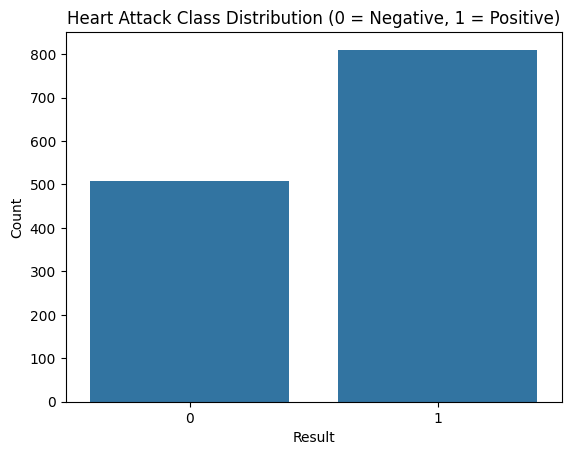

In [8]:
sns.countplot(x='result', data=df)
plt.title("Heart Attack Class Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

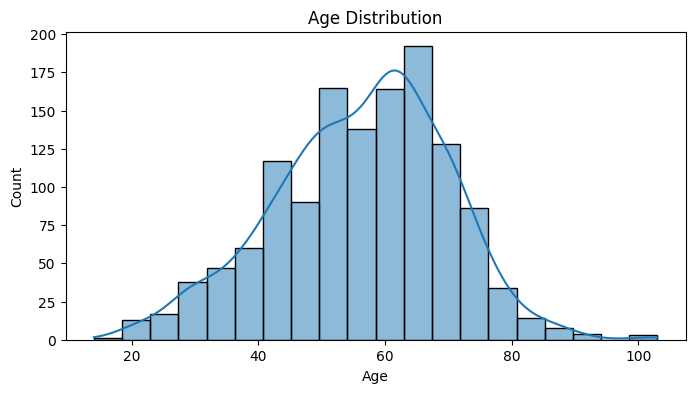

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

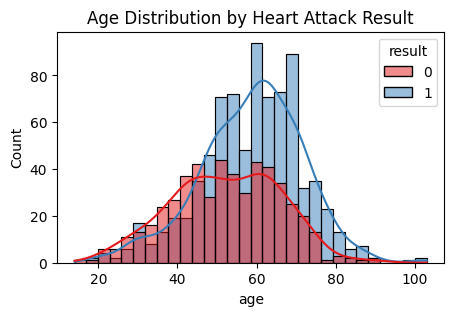

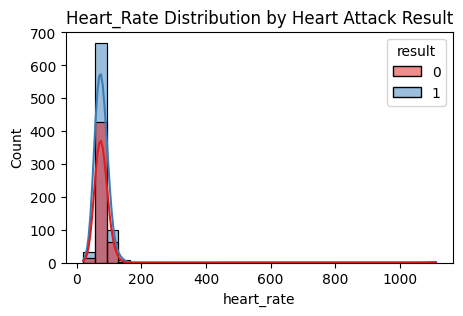

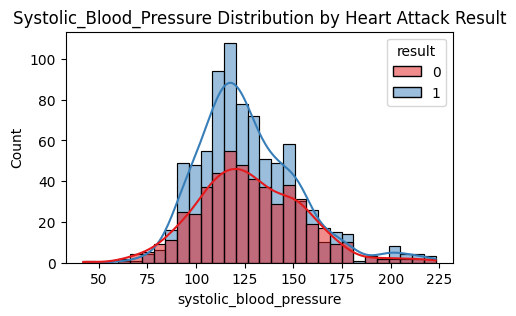

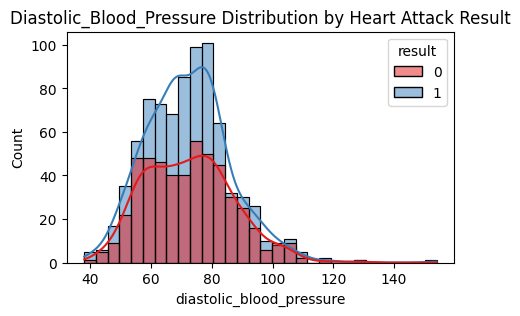

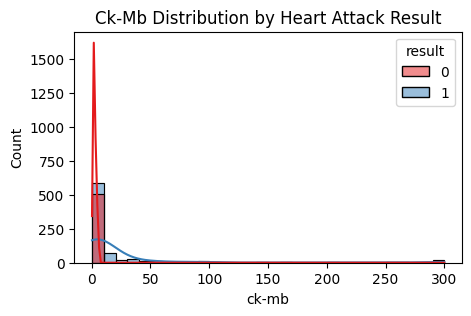

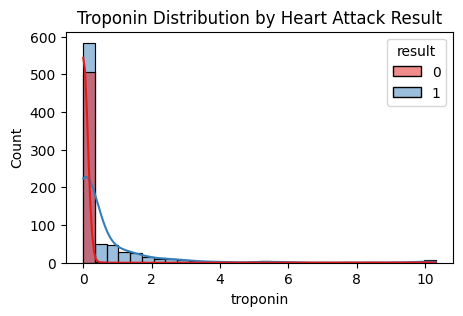

In [25]:
continuous_cols = ['age', 'heart_rate', 'systolic_blood_pressure',
'diastolic_blood_pressure', 'ck-mb', 'troponin']

for col in continuous_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col, kde=True, hue='result', palette='Set1', bins=30)
    plt.title(f"{col.title()} Distribution by Heart Attack Result")
    plt.show()

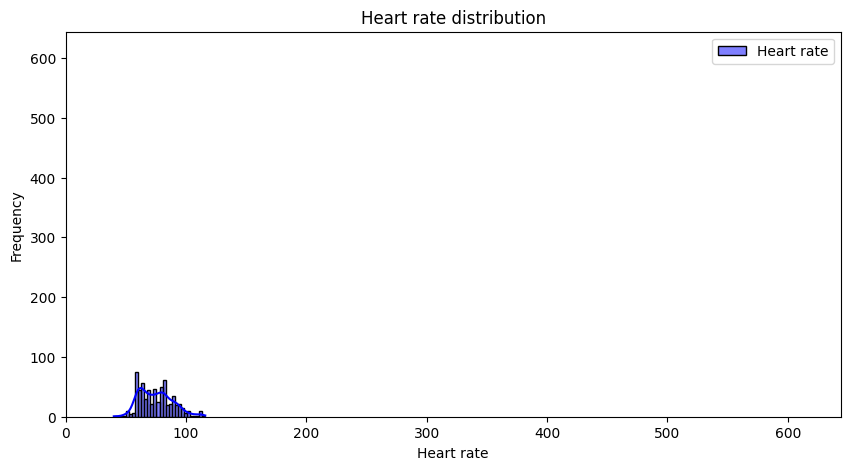

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(data=df['heart_rate'],
             bins=30,
             kde=True,
             color='blue',
             label='Heart rate')
plt.title('Heart rate distribution')
plt.xlim(0,len(df['heart_rate']))
plt.ylim(0,len(df['heart_rate']))
plt.xlabel('Heart rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [27]:

# delete outliers of the dataset 'Heart Rate'
Q1 = df['heart_rate'].quantile(0.25)
Q3 = df['heart_rate'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['heart_rate'] < Q3 + 1.5 * IQR) & (df['heart_rate'] > Q1 - 1.5 * IQR)]


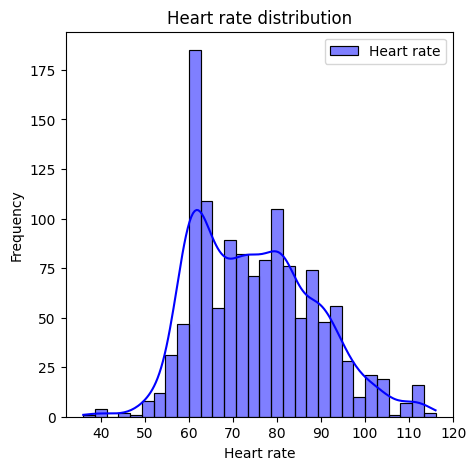

In [32]:
plt.figure(figsize=(5,5))
sns.histplot(data=df['heart_rate'],
             bins=30,
             kde=True,
             color='blue',
             label='Heart rate')
plt.title('Heart rate distribution')

plt.xlabel('Heart rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [35]:
# cleaning outliers of Blood sugar
Q1 = df['blood_sugar'].quantile(0.25)
Q3 = df['blood_sugar'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['blood_sugar'] < Q3 + 1.5 * IQR) & (df['blood_sugar'] > Q1 - 1.5 * IQR)]

In [39]:
Q1 = df['ck-mb'].quantile(0.25)
Q3 = df['ck-mb'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['ck-mb'] < Q3 + 1.5 * IQR) & (df['ck-mb'] > Q1 - 1.5 * IQR)]

In [44]:
Q1 = df['troponin'].quantile(0.25)
Q3 = df['troponin'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['troponin'] < (Q1 - 1.5 * IQR)) | (df['troponin'] > (Q3 + 1.5 * IQR)))]

In [45]:
df['result'].value_counts(normalize=True)

result
0    0.681677
1    0.318323
Name: proportion, dtype: float64

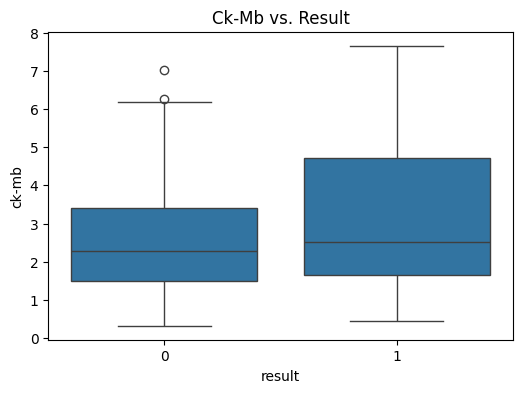

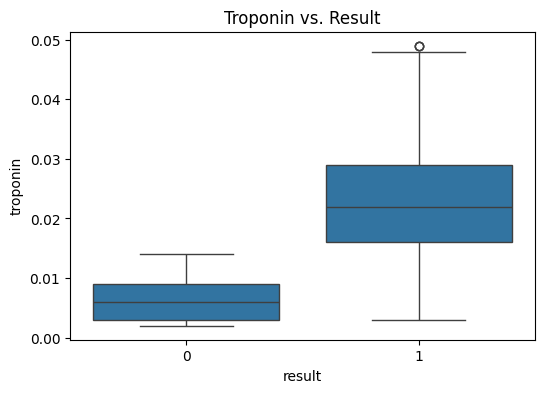

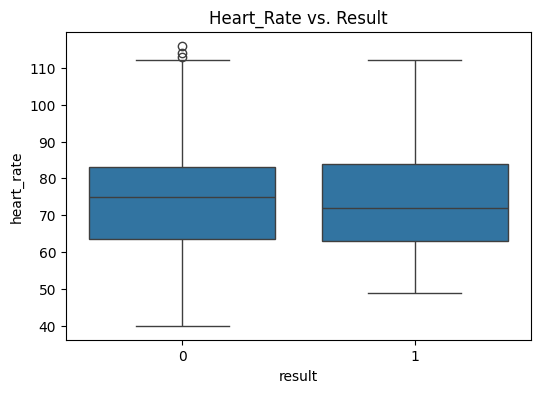

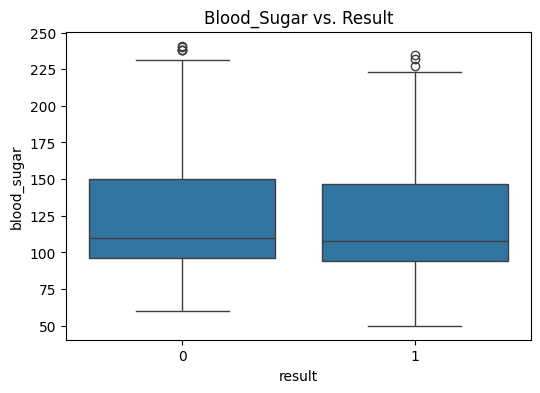

In [46]:
for col in ['ck-mb', 'troponin', 'heart_rate', 'blood_sugar']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='result', y=col, data=df)
    plt.title(f"{col.title()} vs. Result")
    plt.show()

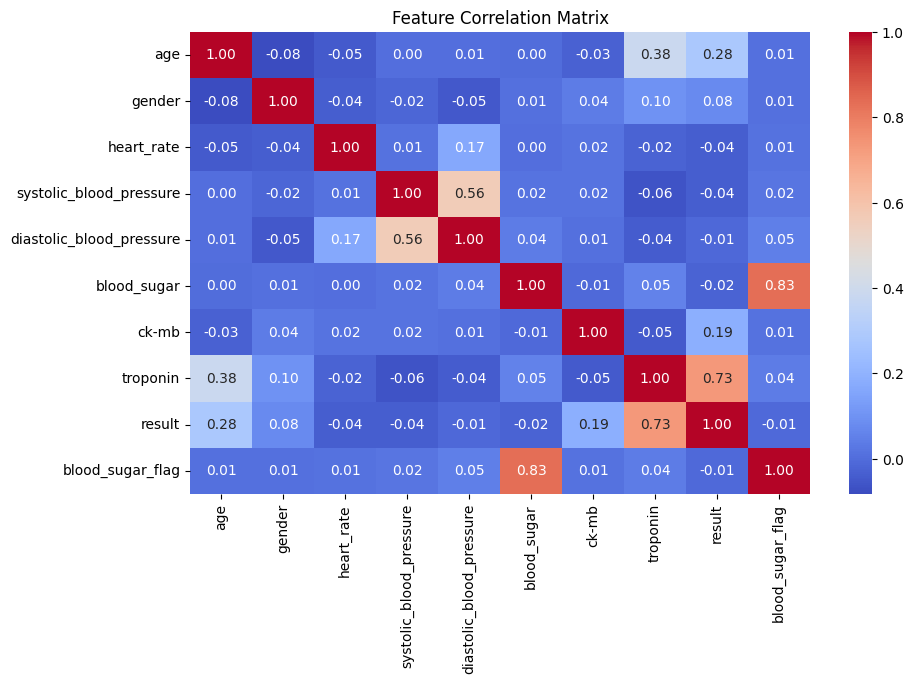

In [47]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [52]:
df.to_csv('F:/GDC/DataSet/Heart Attack Dataset/heart_attack_cleaned2.csv', index=False)